<a href="https://colab.research.google.com/github/mucahitrtn/Image-Processing/blob/main/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 23 23:52:43 2022

@author: mucahitrtn
"""
import cv2 
import numpy as np
import copy
import matplotlib.pyplot as plt

class EdgeDetection():
    
    def __init__(self, path, kSize):
        self.kSize = kSize
        self.image = self.readImg(path)
        self.imgShape = self.image.shape
    
    def readImg(self, path):
        img = cv2.imread(path) 
        img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY) 
        return img
    
    def slice_Img(self, img):
        slice_x = self.kSize
        slice_y = self.kSize
        width = len(img[0])
        height = len(img)
        slices = []
        for i in range(0, height - slice_y + 1):
            for j in range(0, width - slice_x + 1):
                slices.append([[img[a][b] for b in range(j, j + slice_x)]for a in range(i, i + slice_y)])
                      
        return slices
    
    def padding(self):
        copiedImg = copy.deepcopy(self.image)
        return np.pad(copiedImg, 1, "edge")
    
    def conv(self, slicedImg, kernel):
        zeroIm = np.zeros(self.imgShape).astype(np.uint8)
        zeroIm = zeroIm.reshape(-1)
        p = 0
        for i in slicedImg:
            temp = i*kernel
            sum = temp.sum()
            if sum>240:
                sum=255
            if sum<15:
                sum=0
            zeroIm[p] = sum
            p +=1
        return zeroIm.reshape(self.imgShape).astype(np.uint8) 
    
    def convCompass(self, slicedImg, kernel):
        zeroIm = np.zeros(self.imgShape).astype(np.uint8)
        zeroIm = zeroIm.reshape(-1)
        p = 0
       
        for i in slicedImg:
            sumarr = np.zeros(8)
            idx = 0
            
            for k in kernel:
                temp = k*i
                sum = temp.sum()
                if sum>240:
                    sum=255
                if sum<15:
                    sum=0
                sumarr[idx] = sum
                idx += 1
      
            maxVal = np.amax(sumarr)
            zeroIm[p] = maxVal
            p +=1
        
        return zeroIm.reshape(self.imgShape).astype(np.uint8) 
    
    def convRobert(self, slicedImg, kernel):
        zeroIm = np.zeros((self.imgShape[0]-1, self.imgShape[1]-1)).astype(np.uint8)
        zeroIm = zeroIm.reshape(-1)
        p = 0
        for i in slicedImg:
            temp = i*kernel
            sum = temp.sum()
            if sum>240:
                sum=255
            if sum<15:
                sum=0
            zeroIm[p] = sum
            p +=1
        return zeroIm.reshape((self.imgShape[0]-1, self.imgShape[1]-1)).astype(np.uint8) 
    
    def robert(self):
        
        kernelX  = np.array([[1,0],[0,-1]])
        kernelY  = np.array([[0,1],[-1,0]])
        
        imgpdslc = self.slice_Img(self.image)
        x = self.convRobert(imgpdslc, kernelX)
        y = self.convRobert(imgpdslc, kernelY)
        im = (np.abs(x)+np.abs(y))
        plt.imshow(im, cmap = "gray")
        plt.show()
        return im

    def prewit(self):
        kernelX = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        kernelY = np.array([[1, 1, 1], [0 ,0 ,0], [-1, -1, -1]])
        
        imgPadded = self.padding()
        paddedImgSliced = self.slice_Img(imgPadded)
        imgX = self.conv(paddedImgSliced, kernelX)
        imgY = self.conv(paddedImgSliced, kernelY)
        im  = np.abs(imgX)+ np.abs(imgY)
        plt.imshow(im, cmap = "gray")
        plt.show()
        return im
    
    def sobel(self):
        kernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        kernelY = np.array([[1, 2, 1], [0 ,0 ,0], [-1, -2, -1]])
        
        imgPadded = self.padding()
        paddedImgSliced = self.slice_Img(imgPadded)
        imgX = self.conv(paddedImgSliced, kernelX)
        imgY = self.conv(paddedImgSliced, kernelY)
        im  = np.abs(imgX)+ np.abs(imgY)
        plt.imshow(im, cmap = "gray")
        plt.show()
        return im

    def compass(self):
        k1 = np.array([[-1,-1,-1],[+1,-2,1],[1,1, 1]])
        k2 = np.array([[-1,-1, 1],[-1,-2,1],[1,1, 1]])
        k3 = np.array([[-1, 1,1],[-1,-2,1],[-1,1, 1]])
        k4 = np.array([[1, 1, 1],[-1,-2,1],[-1,-1,1]])
        k5 = np.array([[1, 1, 1],[1,-2,1],[-1,-1,-1]])
        k6 = np.array([[1, 1, 1],[1,-2,-1],[1,-1,-1]])
        k7 = np.array([[1, 1,-1],[1,-2,-1],[1, 1,-1]])
        k8 = np.array([[1,-1,-1],[1,-2,-1],[1, 1, 1]])
        kernel = np.array([k1, k2, k3, k4, k5,k6, k7,k8])
        
        imgPadded = self.padding()
        paddedImgSliced = self.slice_Img(imgPadded)
        
        img = self.convCompass(paddedImgSliced, kernel)
        
        plt.imshow(img, cmap = "gray")
        plt.show()
        return img


# COMPASS

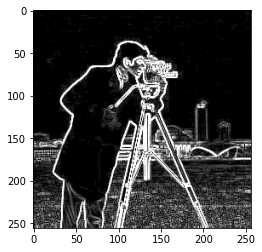

In [2]:
compass = EdgeDetection("/content/cm.png", 3)
a = compass.compass()

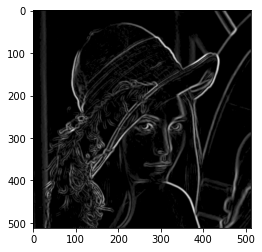

In [9]:
compass = EdgeDetection("/content/lena.png", 3)
a = compass.compass()

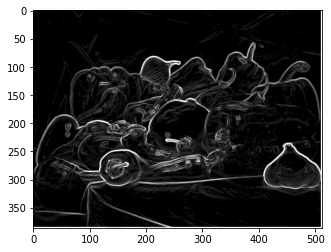

In [13]:
compass = EdgeDetection("/content/indir.png", 3)
a = compass.compass()

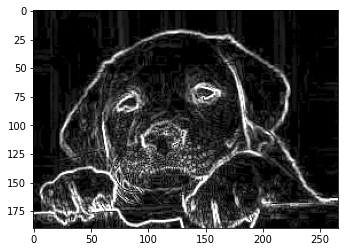

In [22]:
compass = EdgeDetection("/content/im.jpg", 3)
a = compass.compass()

# PREWITT

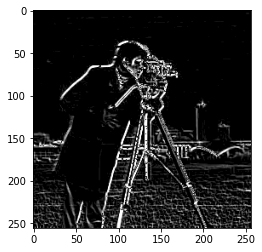

In [7]:
prewitt = EdgeDetection("/content/cm.png", 3)
a = prewitt.prewit()

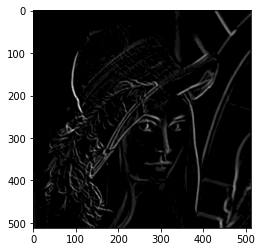

In [10]:
prewitt = EdgeDetection("/content/lena.png", 3)
a = prewitt.prewit()

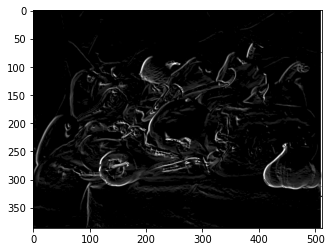

In [14]:
prewitt = EdgeDetection("/content/indir.png", 3)
a = prewitt.prewit()

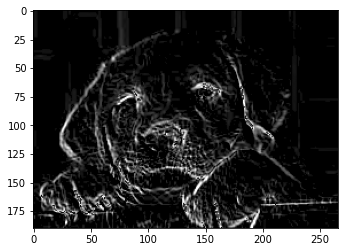

In [23]:
prewitt = EdgeDetection("/content/im.jpg", 3)
a = prewitt.prewit()

# SOBEL

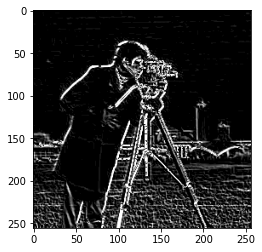

In [8]:
sobel = EdgeDetection("/content/cm.png", 3)
a = sobel.sobel()

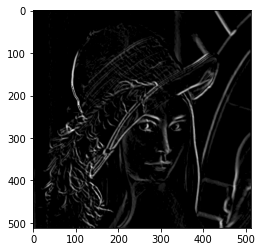

In [11]:
sobel = EdgeDetection("/content/lena.png", 3)
a = sobel.sobel()

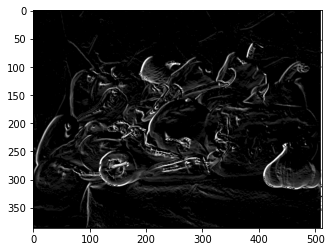

In [15]:
sobel = EdgeDetection("/content/indir.png", 3)
a = sobel.sobel()

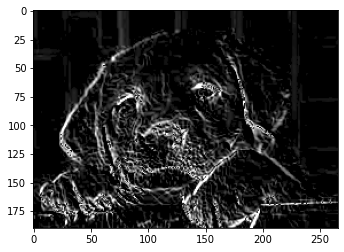

In [24]:
sobel = EdgeDetection("/content/im.jpg", 3)
a = sobel.sobel()

# ROBERT

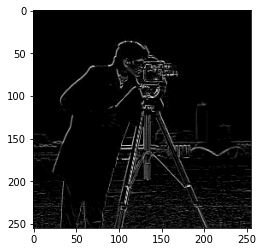

In [3]:
robert = EdgeDetection("/content/cm.png", 2)
a = robert.robert()

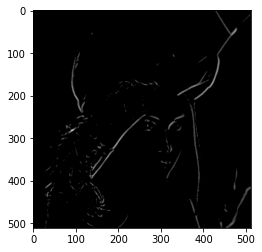

In [12]:
robert = EdgeDetection("/content/lena.png", 2)
a = robert.robert()

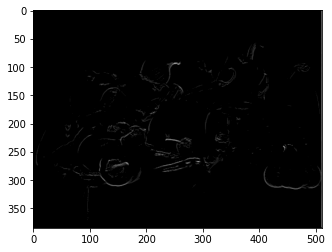

In [20]:
robert = EdgeDetection("/content/indir.png", 2)
a = robert.robert()

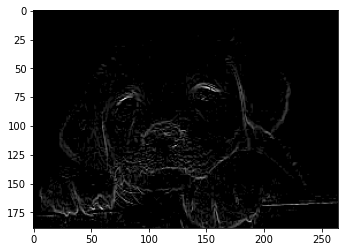

In [25]:
robert = EdgeDetection("/content/im.jpg", 2)
a = robert.robert()